# Проект 4. "Компьютер говорит нет"

## Задача: создать модель банковского скоринга, предсказывающую вероятность дефолта клиета

### Описание данных:
client_id - идентификатор клиента

education - уровень образования

sex - пол заемщика

age - возраст заемщика

car - флаг наличия автомобиля

car_type - флаг автомобиля иномарки

decline_app_cnt - количество отказанных прошлых заявок

good_work - флаг наличия “хорошей” работы

bki_request_cnt - количество запросов в БКИ

home_address - категоризатор домашнего адреса

work_address - категоризатор рабочего адреса

income - доход заемщика

foreign_passport - наличие загранпаспорта

sna - связь заемщика с клиентами банка

first_time - давность наличия информации о заемщике

score_bki - скоринговый балл по данным из БКИ

region_rating - рейтинг региона

app_date - дата подачи заявки

default - флаг дефолта по кредиту

### Целевая переменная - default

In [1]:
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
import seaborn as sns

### Импортируем данные, с которыми будет работать 

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv') 
sample_submission = pd.read_csv('sample_submission.csv')
print('Размерность data_train: ', data_train.shape)
display(data_train.head())
print('Размерность data_test: ', data_test.shape)
display(data_test.head())
print('Размерность sample_submission.csv: ', sample_submission.shape)
display(sample_submission.head())

Размерность data_train:  (73799, 19)


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


Размерность data_test:  (36349, 18)


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


Размерность sample_submission.csv:  (36349, 2)


,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [5]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  36349 non-null  int64
 1   default    36349 non-null  int64
dtypes: int64(2)
memory usage: 568.1 KB


#### Вывод: в тренировочной выборке 73799 клиентов, в тестовой выборке - 36349.  Всего пропусков 478, все пропуски в переменной education. 

### Для обработки признаков объединим тренировочные и тестовые данные в один датасет.

In [6]:
data_train['sample'] = 1
data_test['sample'] = 0
data_test['default'] = 0
data = data_test.append(data_train, sort=False).reset_index(drop=True)

In [7]:
data.shape

(110148, 20)

In [8]:
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,sample,default
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N,0,0
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N,0,0
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y,0,0
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N,0,0
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [10]:
data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,sample,default
count,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000
mean,55074.500000,39.249410,0.273205,0.165514,-1.904535,2.005002,56.751189,1.574945,2.497867,41012.648537,1.731588,2.765570,0.669999,0.085086
std,31797.133063,11.518063,0.799099,0.371645,0.499397,2.266926,13.065923,0.527562,0.687651,45399.735051,1.122652,1.010151,0.470215,0.279010
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000,0.000000
25%,27537.750000,30.000000,0.000000,0.000000,-2.260434,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000,0.000000
50%,55074.500000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,1.000000,0.000000
75%,82611.250000,48.000000,0.000000,0.000000,-1.567888,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,1.000000,0.000000
max,110148.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000,1.000000


In [11]:
data.dtypes.value_counts()

int64      13
object      6
float64     1
dtype: int64

In [12]:
data.isna().sum()

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
sample                0
default               0
dtype: int64

#### Как мы установили ранее, пропущенные значения имеются только в переменной education.

SCH    57998
GRD    34768
UGR    14748
PGR     1865
ACD      291
Name: education, dtype: int64

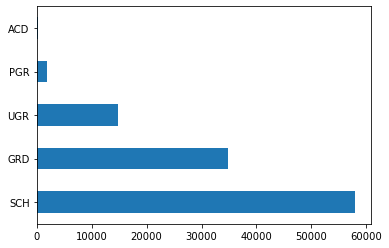

In [13]:
data['education'].value_counts().plot.barh()
data['education'].value_counts()

#### Заполним пропуски значением, которое встречается чаще всего - SCH

In [14]:
data['education'].fillna('SCH', inplace = True)

In [15]:
data.isna().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
sample              0
default             0
dtype: int64

### Полученные признаки сгруппируем в три категории по типу их обработки (временные, категориальные, бинарные и числовые) для удобства при проведении дальнейшего анализа.

#### Преобразуем признак app_date в признак в формате datetime и создадим на его основе новый числовой признак - day

In [16]:
data['app_date'] = pd.to_datetime(data['app_date'], format='%d%b%Y')

In [17]:
data['days'] = (data['app_date'] - data['app_date'].min()).dt.days

In [18]:
time_cols = ['app_date']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time']
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income', 'days']

### Значимость непрерывных значений

<AxesSubplot:>

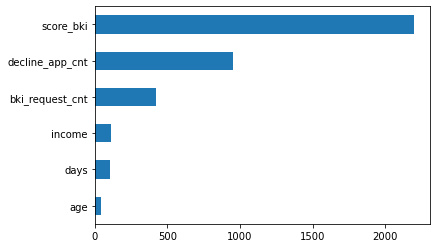

In [19]:
from sklearn.feature_selection import f_classif, mutual_info_classif

imp_num = pd.Series(f_classif(data[num_cols], data['default'])[0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

#### Наиболее значимый признак - score_bki

## Категориальные признаки: education, region_rating, home_address, work_address, sna, first_time.

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import f_classif, mutual_info_classif

label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])

### Для оценки значимости категориальных и бинарных признаков используем функцию mutual_info_classif из библиотеки sklearn.

In [21]:
from sklearn.feature_selection import f_classif, mutual_info_classif

In [22]:
label_encoder_ed = LabelEncoder()

data['education'] = pd.Series(label_encoder_ed.fit_transform(data['education']))
print(dict(enumerate(label_encoder_ed.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}


<AxesSubplot:>

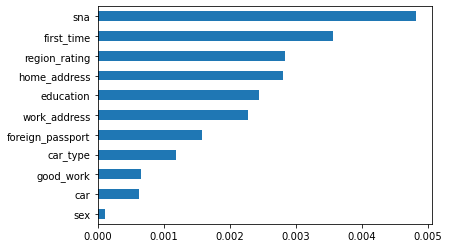

In [23]:
imp_cat = Series(mutual_info_classif(data[bin_cols + cat_cols], data['default'], discrete_features=True), index=bin_cols + cat_cols)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

#### Вывод: наиболее значимый параметр - sna.

## Числовые признаки: age, decline_app_cnt, score_bki, bki_request_cnt, income, days.

In [24]:
num_cols_an = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income', 'days']

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


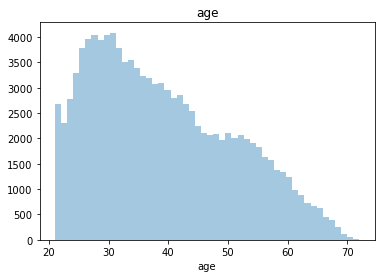

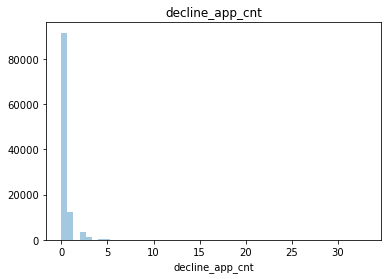

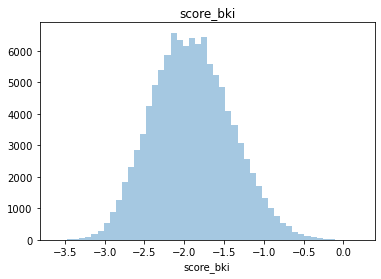

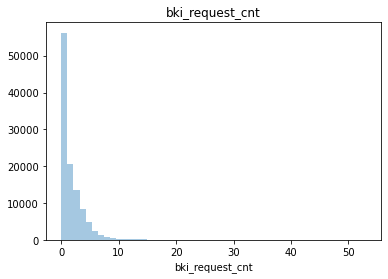

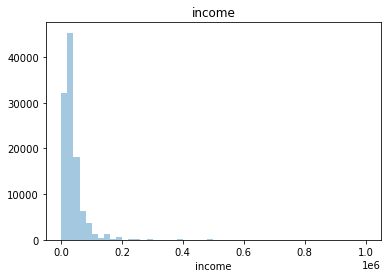

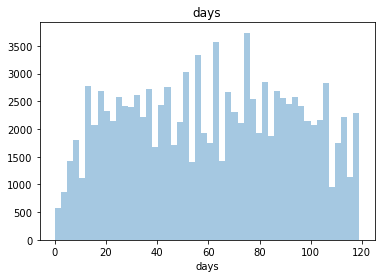

In [25]:
for i in num_cols_an:
    plt.figure()
    sns.distplot(data[i], kde=False, rug=False)
    plt.title(i)
    plt.show()

### Построим графики распределения логарифмированных переменных, чтобы переменные стали менее смещенными. 

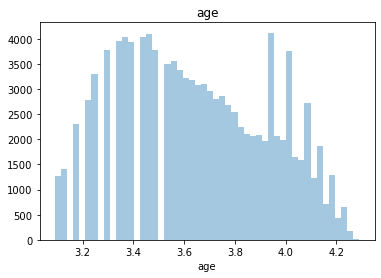

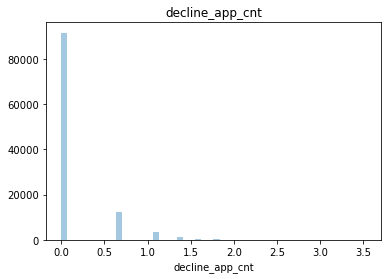

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


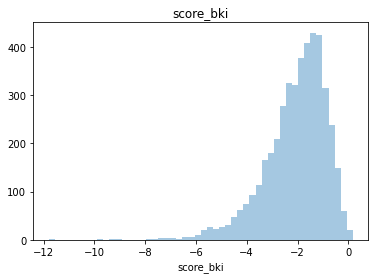

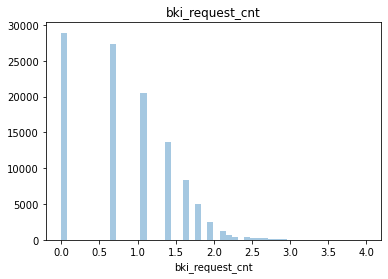

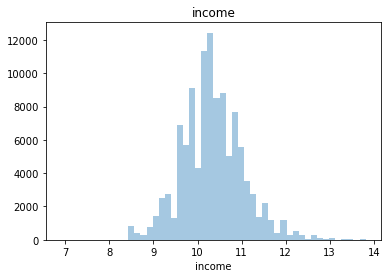

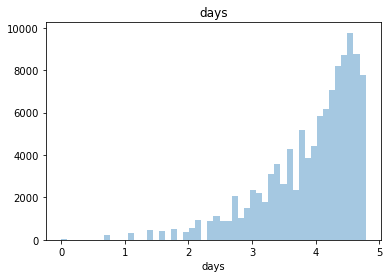

In [26]:
for i in num_cols_an:
    plt.figure()
    sns.distplot(np.log(data[i] + 1), kde=False, rug=False)
    plt.title(i)
    plt.show()

### Поиск выбросов

In [27]:
data[num_cols].describe()

,age,decline_app_cnt,score_bki,bki_request_cnt,income,days
count,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000,110148.000000
mean,39.249410,0.273205,-1.904535,2.005002,41012.648537,60.971466
std,11.518063,0.799099,0.499397,2.266926,45399.735051,32.076078
min,21.000000,0.000000,-3.624586,0.000000,1000.000000,0.000000
25%,30.000000,0.000000,-2.260434,0.000000,20000.000000,33.000000
50%,37.000000,0.000000,-1.920823,1.000000,30000.000000,62.000000
75%,48.000000,0.000000,-1.567888,3.000000,48000.000000,89.000000
max,72.000000,33.000000,0.199773,53.000000,1000000.000000,119.000000


In [28]:
data_1 = data[num_cols][data['sample'] == 1]
q_min = data.quantile(q=0.25) - 1.5 *(data.quantile(q=0.75) - data.quantile(q=0.25))
q_max = data.quantile(q=0.25) + 1.5 *(data.quantile(q=0.75) - data.quantile(q=0.25))

In [29]:
qfil = (data_1 < q_min) | (data_1 > q_max)
qfil.sum()
qfil.sum()/len(qfil)

age                 0.082413
bki_request_cnt     0.102698
car                 0.000000
car_type            0.000000
client_id           0.000000
days                0.012954
decline_app_cnt     0.170531
default             0.000000
education           0.000000
first_time          0.000000
foreign_passport    0.000000
good_work           0.000000
home_address        0.000000
income              0.132427
region_rating       0.000000
sample              0.000000
score_bki           0.093538
sex                 0.000000
sna                 0.000000
work_address        0.000000
dtype: float64

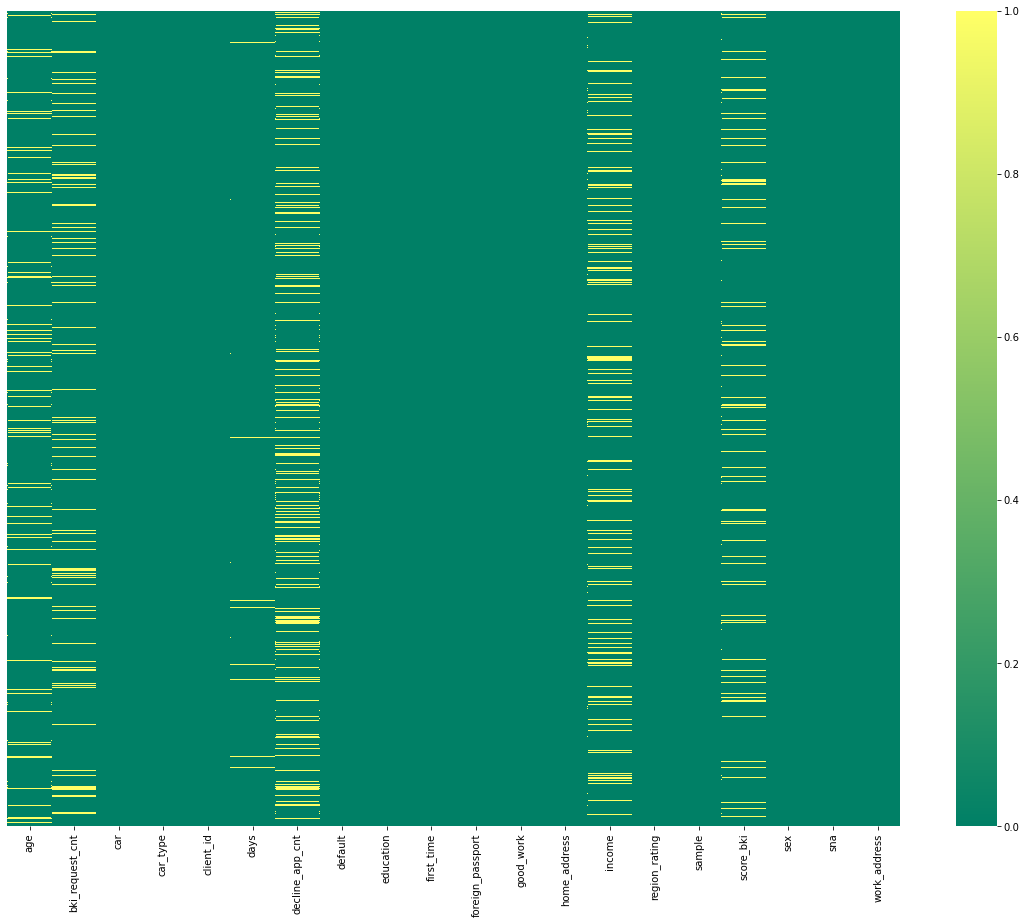

In [30]:
fig, ax = plt.subplots(figsize=(20, 15))
sns_heatmap = sns.heatmap(qfil, yticklabels=False, cmap='summer')

#### По результатам, оставляем все признаки. 

### Оценка корреляций

<AxesSubplot:>

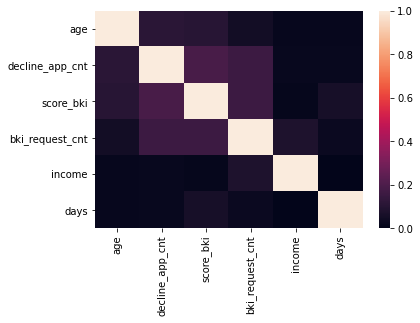

In [31]:
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

### Подготовка данных к машинному обучению

#### Используем dummy-кодирование

In [32]:
data = pd.get_dummies(data, columns=cat_cols, dummy_na=False)

#### Стандартизируем числовые признаки, объединив числовые, бинарные и закодированные категриальные переменные в одно признаковое пространство, разделив при этом признаки и целевую переменную default

In [33]:
data[num_cols] = pd.DataFrame(StandardScaler().fit_transform(data[num_cols]), columns=num_cols)

In [34]:
data.columns
data

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address_2,work_address_3,sna_1,sna_2,sna_3,sna_4,first_time_1,first_time_2,first_time_3,first_time_4
0,74835,2014-03-22,1,-0.889859,1,1,-0.341893,0,-0.735587,0.438921,...,1,0,1,0,0,0,0,0,0,1
1,17527,2014-01-24,0,-0.021654,0,0,5.915180,0,0.800039,-0.002207,...,1,0,0,0,0,1,0,0,1,0
2,75683,2014-03-23,1,0.933372,1,1,-0.341893,0,0.426908,-0.443335,...,1,0,1,0,0,0,0,0,1,0
3,26883,2014-02-03,1,1.454295,0,0,-0.341893,0,-0.940432,-0.443335,...,1,0,1,0,0,0,0,0,1,0
4,28862,2014-02-04,0,-0.108474,0,0,-0.341893,0,-1.167347,-0.884463,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,54887,2014-03-04,0,0.499269,0,0,-0.341893,0,0.225214,0.438921,...,1,0,0,0,0,1,0,0,0,1
110144,76821,2014-03-24,1,0.151987,1,1,-0.341893,0,-0.307360,-0.443335,...,1,0,1,0,0,0,0,0,0,1
110145,103695,2014-04-22,1,-0.716218,0,0,-0.341893,0,0.784750,0.880049,...,0,1,0,1,0,0,0,1,0,0
110146,861,2014-01-04,0,-0.889859,0,0,-0.341893,1,0.851432,0.438921,...,0,1,0,1,0,0,0,0,1,0


In [35]:
data.drop('app_date', axis=1, inplace=True)

### Построение модели

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

random_state=42

In [37]:
X = data[data['sample'] == 1].drop(['client_id', 'sample', 'default'], axis=1)
y = data[data['sample'] == 1]['default']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


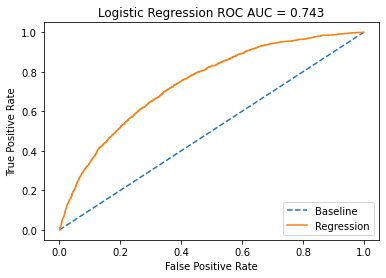

In [39]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

### Подбор гиперпараметров

In [40]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
model = LogisticRegression(solver='liblinear', max_iter=10000)
model.fit(X_train, y_train)
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l2
Лучшее C: 7.742636826811269


### Результат выбранной модели

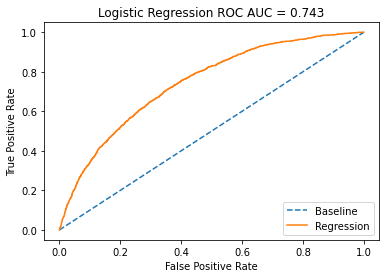

In [41]:
probs = best_model.predict_proba(X_test)
probs = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

### Submission

In [42]:
t_data = data[data['sample'] == 0].drop(['client_id', 'sample', 'default'], axis=1)

In [43]:
t_data.sample(10)

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,income,foreign_passport,...,work_address_2,work_address_3,sna_1,sna_2,sna_3,sna_4,first_time_1,first_time_2,first_time_3,first_time_4
15457,0,-0.716218,0,0,3.412351,0,0.603619,-0.002207,-0.572972,0,...,1,0,0,0,0,1,0,1,0,0
33996,1,-1.410783,1,0,-0.341893,0,0.494871,-0.443335,0.197961,0,...,0,1,1,0,0,0,0,0,0,1
15968,1,0.586090,0,0,-0.341893,0,1.093664,1.321177,-0.088385,0,...,1,0,1,0,0,0,0,1,0,0
725,1,0.325628,0,0,-0.341893,0,0.615251,0.438921,-0.242572,0,...,0,1,0,0,0,1,1,0,0,0
1191,1,-1.150321,0,0,-0.341893,0,-0.578985,-0.002207,0.087828,0,...,0,1,1,0,0,0,0,0,1,0
5938,1,0.933372,0,0,-0.341893,0,-0.239420,-0.002207,-0.572972,0,...,1,0,1,0,0,0,0,0,1,0
916,0,-0.803039,0,0,-0.341893,0,0.150648,-0.884463,-0.286625,0,...,1,0,1,0,0,0,0,0,1,0
28957,0,0.151987,0,0,0.909522,0,-0.464687,1.762305,-0.462838,0,...,1,0,1,0,0,0,0,0,1,0
15465,1,-0.021654,0,0,-0.341893,0,1.147431,-0.884463,0.087828,0,...,1,0,1,0,0,0,1,0,0,0
34127,0,2.235680,0,0,-0.341893,0,-1.590826,-0.884463,-0.022305,0,...,0,1,1,0,0,0,0,0,1,0


In [44]:
t_data.shape, data_test.shape

((36349, 37), (36349, 20))

In [45]:
sample_submission

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0
...,...,...
36344,83775,0
36345,106254,0
36346,81852,0
36347,1971,0


In [53]:
predict_submission = best_model.predict_proba(t_data)

In [54]:
best_model.classes_

array([0, 1], dtype=int64)

In [55]:
submission = pd.DataFrame(data[data['sample'] == 0]['client_id'])

In [58]:
submission['default'] = predict_submission[:, 1]

In [59]:
submission

,client_id,default
0,74835,0.036743
1,17527,0.336246
2,75683,0.058583
3,26883,0.091231
4,28862,0.028633
...,...,...
36344,83775,0.285938
36345,106254,0.019180
36346,81852,0.300508
36347,1971,0.170179


In [60]:
submission.sample(10)

,client_id,default
991,46277,0.055595
35419,56611,0.202905
21624,64651,0.101442
27176,60216,0.287175
9314,91211,0.112092
1599,47885,0.043457
3336,7150,0.047846
27186,85166,0.116444
22570,19247,0.240417
11252,60017,0.044365


In [61]:
submission.to_csv('submission.csv', index=False)